In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Online Sales Data.csv')
df.dropna()
df = df.loc[~df.duplicated()]
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [6]:

dfBarPlot1 = df.groupby(['Product Category']).sum()
dfBarPlot1 = dfBarPlot1.reset_index()

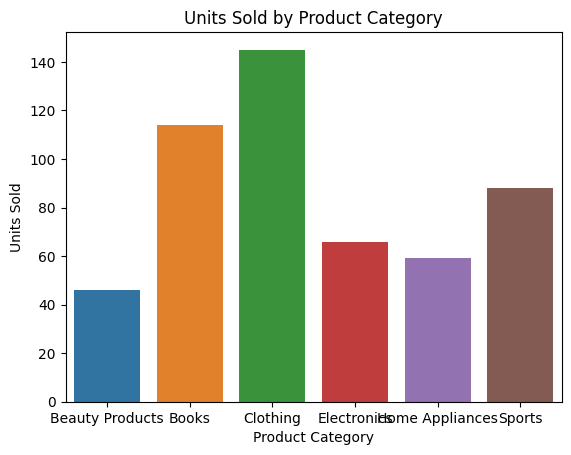

In [7]:
#Bar Plot (Units Sold by Product Category)
#Inference: As compared to other product categories, clothing products and books have more products sold.
sns.barplot(x='Product Category', y='Units Sold', data=dfBarPlot1)
plt.title('Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

In [8]:
dfBarPlot2 = df.groupby(['Region']).sum()
dfBarPlot2 = dfBarPlot2.reset_index()

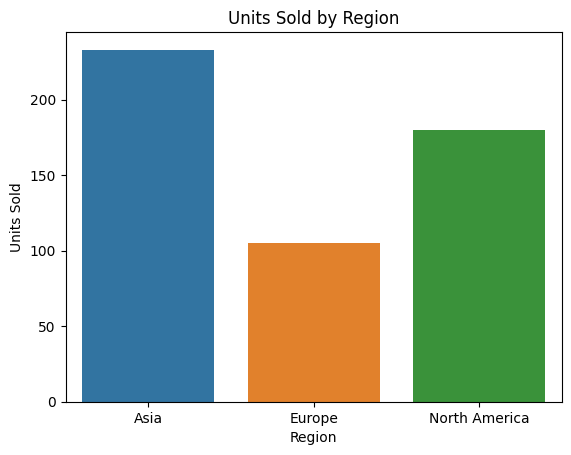

In [9]:
#Bar Plot (Units Sold by Product Category)
#Inference: Asia has more number of products sold as compared to other regions.
sns.barplot(x='Region', y='Units Sold', data=dfBarPlot2)
plt.title('Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.show()

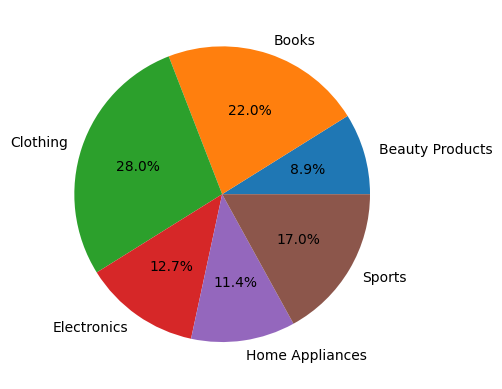

In [11]:
#Pie Chart (Product Category)
#inference: All product category have significant contribution towards the total products sold.
#           where books+clothing contribute to the majority of the total products sold.

plt.pie(dfBarPlot1['Units Sold'], labels=dfBarPlot1['Product Category'], autopct='%1.1f%%')
plt.show()

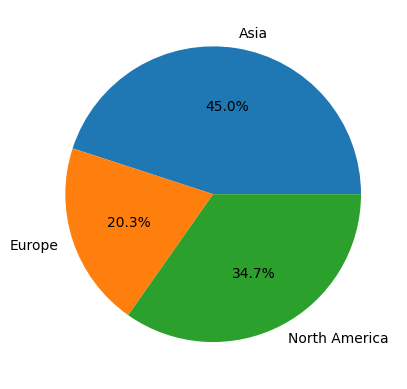

In [12]:
#pie chart (wrt Asia)
#inference: Europe has the least customer contribution in terms of the quantity of products sold.

plt.pie(dfBarPlot2['Units Sold'], labels=dfBarPlot2['Region'], autopct='%1.1f%%')
plt.show()

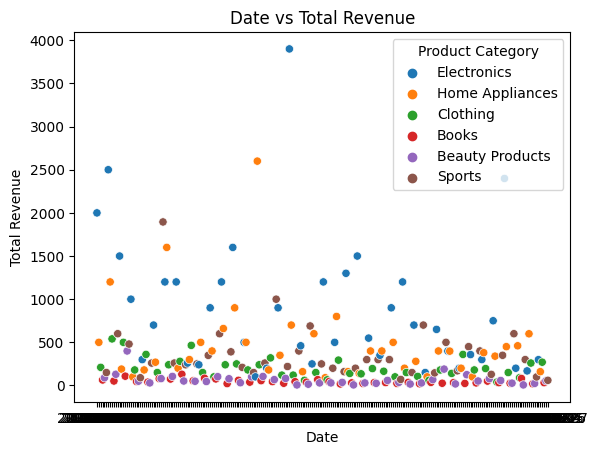

In [13]:
#scatterplot 
#inference: electronic products have higher total revenues as compared to products in categories of 
#           beauty, sports and books.
sns.scatterplot(x='Date', y='Total Revenue', data=df, hue='Product Category')
plt.title('Date vs Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

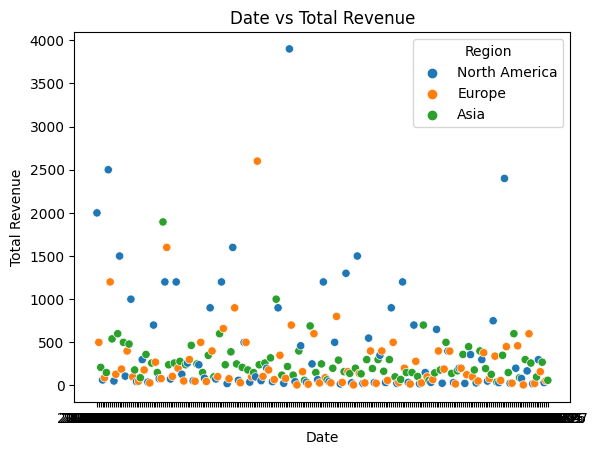

In [14]:
#scatterplot (wrt regions)
# inference: north america sells higher range of products that can generate more revenue as compared 
#           to other regions
sns.scatterplot(x='Date', y='Total Revenue', data=df, hue='Region')
plt.title('Date vs Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [15]:
#roll up
tempDf = df.copy()
for i in tempDf.index:
  date = tempDf['Date'][i]
  date = date[:-3]
  tempDf.at[i,'Date'] = date

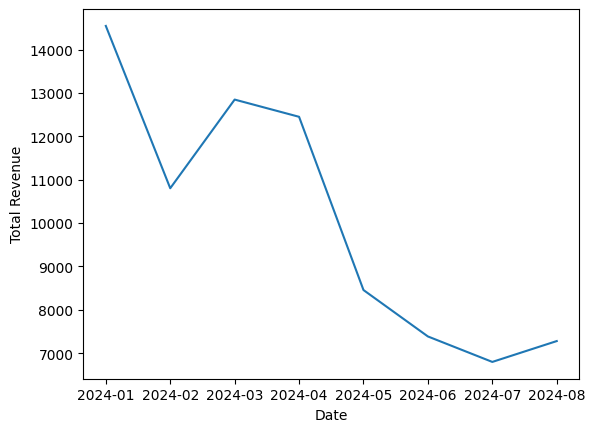

In [17]:
#timeline chart - roll up
#inference: total revenue has reduced to half of its intial revwnue, from January,2024 to August,2024
sns.lineplot(data=tempDf.groupby(['Date']).sum('Total Revenue'), x='Date', y='Total Revenue')
plt.show()

C:\Users\SHIYAJI'S\AppData\Local\Temp\ipykernel_12444\2472037185.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=dfRollUp['Date'],rotation=45)


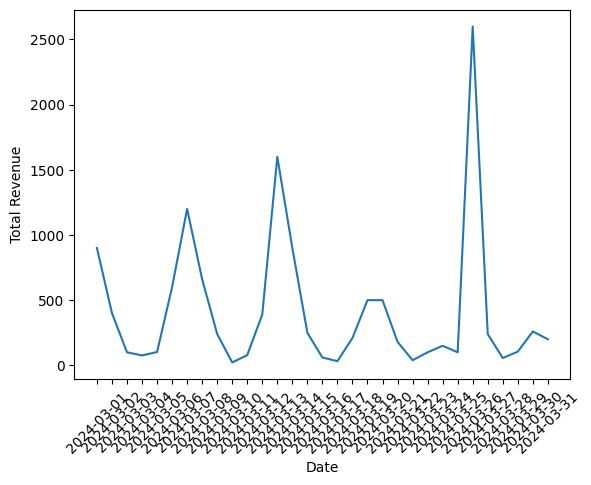

In [18]:
#timeline chart - drill down
#inference: from 1st April,2024 to 31st April,2024, the sales are not constant; having a peak around 
#           every weekend of the month.
compDate = '2024-03'
dfRollUp  = df.copy()
for i in dfRollUp.index:
  if(dfRollUp['Date'][i][:-3]!=compDate):
    dfRollUp.drop(i, axis='rows',inplace=True)

g = sns.lineplot(x='Date',y='Total Revenue', data=dfRollUp)
g.set_xticklabels(labels=dfRollUp['Date'],rotation=45)
plt.show()

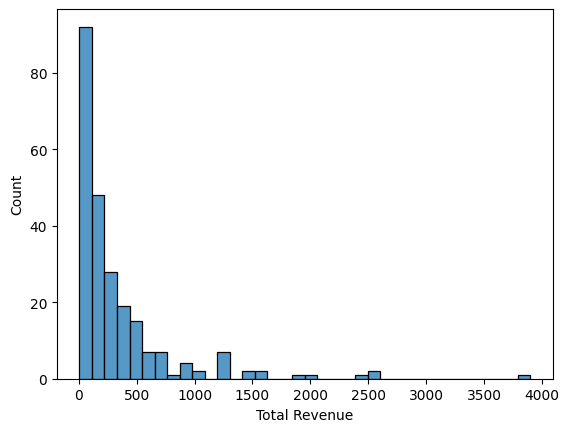

In [19]:
#histogram - Total Revenue
#inference: the most frequently according range of total purchases lie below 500 
sns.histplot(data=df,x='Total Revenue')
plt.show()

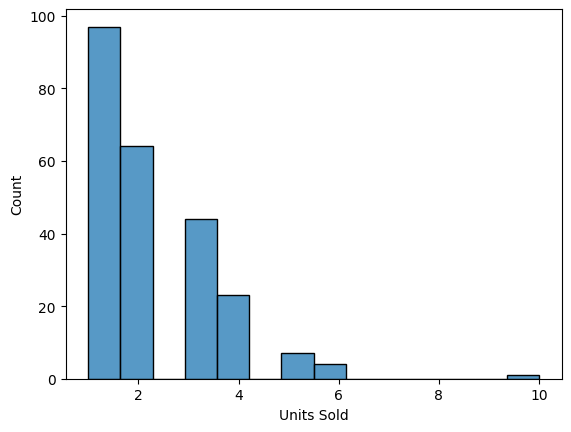

In [20]:
#histogram - Units Sold
#inference: most of the times, customers are purchasing 2-4 units of a product.
sns.histplot(data=df, x='Units Sold')
plt.show()

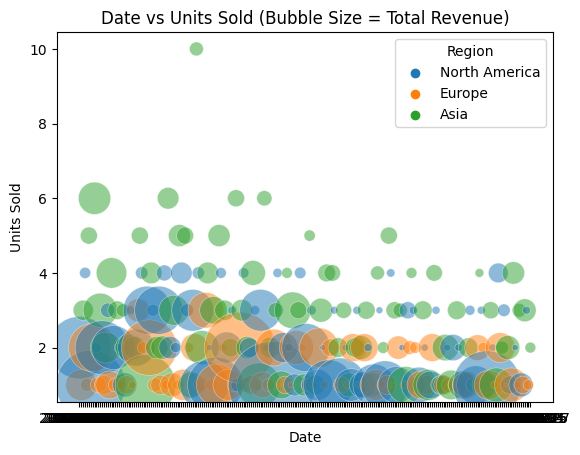

In [23]:
#bubblePlot
#inference: In Asia, more quantity of items are sold but the revenue generated is less.
#           In North America, the revenue generated is more comapred to the units sold.

sns.scatterplot(x='Date', y='Units Sold', data=df, s=df['Total Revenue'],alpha=0.5, hue='Region')
plt.title('Date vs Units Sold (Bubble Size = Total Revenue)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

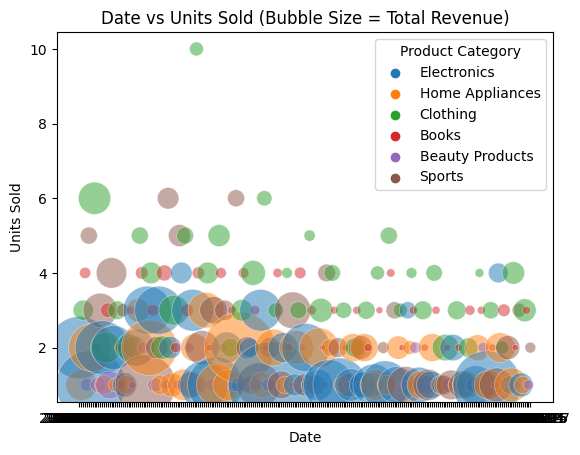

In [24]:
#bubblePlot
#inference: sports and clothing items are sold more but generates lesser revenue
#           electronics and home appliances are sold lesser in quantity but generate 
#           greater revenue

sns.scatterplot(x='Date', y='Units Sold', data=df, s=df['Total Revenue'],alpha=0.5, hue='Product Category')
plt.title('Date vs Units Sold (Bubble Size = Total Revenue)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()